In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [2]:
def parse_market_cap(mkt_cap_str):
    unit_dict = {'Million': 1e6, 'Billion': 1e9, 'Trillion': 1e12}
    unit_pat = '|'.join(unit_dict.keys())
    pattern = rf'\$([.0-9]*)\s*({unit_pat})'
    match = re.match(pattern, mkt_cap_str)
    amount, unit = match.groups()
    amount = float(amount) * unit_dict[unit]
    return amount


def normalize_exchanges_table(exchanges_table):
    exchanges_table = exchanges_table[['Country', 'Exchange', 'Market Cap (USD)']]
    exchanges_table.loc[:, 'Market Cap (USD)'] = exchanges_table[
        'Market Cap (USD)'
    ].apply(parse_market_cap)
    return exchanges_table

In [3]:
response = requests.get('https://www.tradinghours.com/markets-by-capitalization')
soup = BeautifulSoup(response.content, 'html.parser')
exchanges_table = soup.find('table', id='capTable')
exchanges_table = pd.read_html(str(exchanges_table))[0]
exchanges_table = normalize_exchanges_table(exchanges_table)

/home/vlad/projects/notebooks/.env/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [4]:
from qplot import get_axes

tmp = exchanges_table.set_index('Exchange')['Market Cap (USD)']
tmp = tmp.sort_values(ascending=False)[:20]

In [5]:
import qplot.activate

2020-09-13 13:07:50.811 | INFO     | qplot.activate:<module>:26 - IPython detected, applying inline plotting and svg figure format.


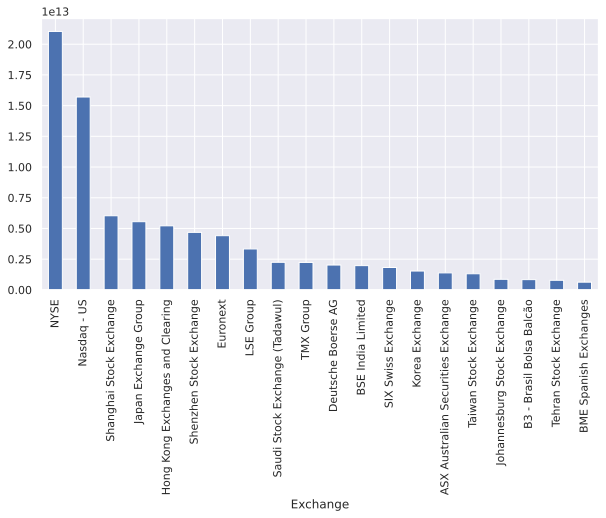

In [6]:
ax = get_axes(10)
tmp.plot.bar(ax=ax);

